In [32]:
import pandas as pd
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from typing import List, Dict


class ProcessData:

       def __init__(self, *args, **kwargs):
              self.data_folder_address = Path("__file__").parent / "data" or kwargs.get("data_folder_address")
              self.keep_cols = kwargs.get("keep_cols")

       @property
       def data_file_list(self):
              _list = [file for file in os.listdir(self.data_folder_address)]
              return _list

       def read_data(self, file_name):
              address = self.data_folder_address / file_name
              df = pd.read_csv(address, encoding= 'unicode_escape')
              return df

       def rename_columns(self, df):

              column_list = df.columns.tolist()
              first_row = df.iloc[0].tolist()
              new_column_list = [str(i) + "_" + str(j) for i, j in zip(column_list, first_row)]
              df = df.drop([0])
              df.columns = new_column_list
              return df

       def make_float(self, df, except_cols:List[str] = None):
              if not except_cols:
                     df = df.astype(float)
                     return df
              for col in df.columns:
                  if col not in except_cols:
                         df[col] = df[col].astype(float)
              return df

       def keep_columns(self, df, keep_cols=None):
              if keep_cols:
                     df = df[keep_cols]
                     return df
              else:
                     keep_cols = [
                            'Elapsed Time_(hh:mm:ss)', 
                         'Sample Temp_(°F)',
                            'Pressure_(PSIg)', 
                         'Rotor Speed_(RPM)',
                            'Shear Rate_(1/s)',
                         'Shear Stress_(dyne/cm²)',
                            'Viscosity_(cP)',
#                          'Bob Deflection_(deg.)',
#                             'Torque_(dyne-cm)', 
#                          'Raw Encoder Value_(cts)'
                     ]
                     df = df[keep_cols]
                     return df

       def plot_heatmap(self, df, title='Correlation Heatmap', figzie=(10,8)):
              plt.figure(figsize=figzie)
              sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
              # add title
              plt.title(title, fontsize=20)
              plt.show()

       def plot_pairplot(self, df):
              plt.figure(figsize=(10,8))
              sns.pairplot(df, height=2)
              plt.show()

       def print_corr_with_resp(self, df, resp_col="Viscosity_(cP)"):
              corr  = df.corr()[resp_col].sort_values(ascending=False)
              print(corr)

       def concate_data(self, dataframes:Dict[str, pd.DataFrame] = None) -> pd.DataFrame:

              dataframe_list = []
              for key, df in dataframes.items():
                     df["dataframe_name"] = key
                     # check if there is -P in the key then make a new column called condition and paste 'P constant' for all rows, else 'Temprature constant'

                     if "-P" in key:
                            df["condition"] = "Pressure constant"
                     else:
                            df["condition"] = "Temprature constant"

                     dataframe_list.append(df)

              # concatenate all dataframes
              df = pd.concat(dataframe_list, ignore_index=True)
              return df



In [34]:
list_of_files = [
       'hpybf4-AA-cons-P-2.csv',
       # 'hpybf4-AA-cons-P.csv',
       'hpybf4-AA-cons-T.csv',
    
       'hpybr-AA-cons-T.csv',
       'hpybr-cons-P.csv',
    
       # 'opybr-AA-cons-P-2.csv',
       'opybr-AA-cons-P.csv',
       'opybr-AA-cons-T.csv'
]

dataframes = {}
for file in list_of_files:
       obj = ProcessData()
       # obj.data_file_list
       df = obj.read_data(file)
       df = obj.rename_columns(df)
       # df = obj.make_float(df)
       df = obj.keep_columns(df)
       df = obj.make_float(df, except_cols=["Elapsed Time_(hh:mm:ss)"])
       dataframes[file] = df


In [35]:
final_df = obj.concate_data(dataframes)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23577 entries, 0 to 23576
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Elapsed Time_(hh:mm:ss)  23577 non-null  object 
 1   Sample Temp_(°F)         23577 non-null  float64
 2   Pressure_(PSIg)          23577 non-null  float64
 3   Rotor Speed_(RPM)        23577 non-null  float64
 4   Shear Rate_(1/s)         23577 non-null  float64
 5   Shear Stress_(dyne/cm²)  23577 non-null  float64
 6   Viscosity_(cP)           23577 non-null  float64
 7   dataframe_name           23577 non-null  object 
 8   condition                23577 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.6+ MB


In [37]:
final_df.columns

Index(['Elapsed Time_(hh:mm:ss)', 'Sample Temp_(°F)', 'Pressure_(PSIg)',
       'Rotor Speed_(RPM)', 'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)',
       'Viscosity_(cP)', 'dataframe_name', 'condition'],
      dtype='object')

In [38]:
final_df["condition"].unique()

array(['Pressure constant', 'Temprature constant'], dtype=object)

In [39]:
final_df.head()

,Elapsed Time_(hh:mm:ss),Sample Temp_(°F),Pressure_(PSIg),Rotor Speed_(RPM),Shear Rate_(1/s),Shear Stress_(dyne/cm²),Viscosity_(cP),dataframe_name,condition
0,0:00:01,71.4,65.0,0.0,0.0,0.0001,0.0000,hpybf4-AA-cons-P-2.csv,Pressure constant
1,0:00:02,71.4,65.0,58.8,50.0,0.0001,0.0000,hpybf4-AA-cons-P-2.csv,Pressure constant
2,0:00:03,71.6,65.0,58.8,50.0,164.7949,329.5898,hpybf4-AA-cons-P-2.csv,Pressure constant
3,0:00:04,71.6,62.0,58.8,50.0,163.7761,327.5521,hpybf4-AA-cons-P-2.csv,Pressure constant
4,0:00:05,71.6,62.0,58.8,50.0,163.7761,327.5521,hpybf4-AA-cons-P-2.csv,Pressure constant


In [40]:
final_df["Elapsed Time_(hh:mm:ss)"].dtype

dtype('O')

In [41]:
# make Elapsed Time_(hh:mm:ss) column to seconds
final_df["Elapsed Time_(hh:mm:ss)"] = final_df["Elapsed Time_(hh:mm:ss)"].apply(lambda x: x.split(":"))
final_df["Elapsed Time_(hh:mm:ss)"] = final_df["Elapsed Time_(hh:mm:ss)"].apply(lambda x: int(x[0])*3600 + int(x[1])*60 + int(x[2]))


ValueError: invalid literal for int() with base 10: '1.16E-05'

In [42]:
# make a new column called ionic liquid. if hpybr then hpybr, if hpybf4 then hpybf4, if opybr then opybr
final_df["ionic_liquid"] = final_df["dataframe_name"].apply(lambda x: x.split("-")[0])
ils_map = {
         "hpybr": "HPyBr",
         "hpybf4": "HPyBF4",
         "opybr": "OPyBr"
}
final_df["ionic_liquid"] = final_df["ionic_liquid"].map(ils_map)

In [43]:
final_df.head()

,Elapsed Time_(hh:mm:ss),Sample Temp_(°F),Pressure_(PSIg),Rotor Speed_(RPM),Shear Rate_(1/s),Shear Stress_(dyne/cm²),Viscosity_(cP),dataframe_name,condition,ionic_liquid
0,"[0, 00, 01]",71.4,65.0,0.0,0.0,0.0001,0.0000,hpybf4-AA-cons-P-2.csv,Pressure constant,HPyBF4
1,"[0, 00, 02]",71.4,65.0,58.8,50.0,0.0001,0.0000,hpybf4-AA-cons-P-2.csv,Pressure constant,HPyBF4
2,"[0, 00, 03]",71.6,65.0,58.8,50.0,164.7949,329.5898,hpybf4-AA-cons-P-2.csv,Pressure constant,HPyBF4
3,"[0, 00, 04]",71.6,62.0,58.8,50.0,163.7761,327.5521,hpybf4-AA-cons-P-2.csv,Pressure constant,HPyBF4
4,"[0, 00, 05]",71.6,62.0,58.8,50.0,163.7761,327.5521,hpybf4-AA-cons-P-2.csv,Pressure constant,HPyBF4


In [44]:
list_of_files = [
       'hpybf4-AA-cons-P-2.csv',
       # 'hpybf4-AA-cons-P.csv',
       'hpybf4-AA-cons-T.csv',
       'hpybr-AA-cons-T.csv',
       # 'opybr-AA-cons-P-2.csv',
       'opybr-AA-cons-P.csv',
       'opybr-AA-cons-T.csv'
]
list_of_files

['hpybf4-AA-cons-P-2.csv',
 'hpybf4-AA-cons-T.csv',
 'hpybr-AA-cons-T.csv',
 'opybr-AA-cons-P.csv',
 'opybr-AA-cons-T.csv']

In [45]:
sub_hpybf4_p_mask = final_df["dataframe_name"] == "hpybf4-AA-cons-P-2.csv"
sub_hpybf4_t_mask = final_df["dataframe_name"] == "hpybf4-AA-cons-T.csv"

sub_hpybr_t_mask = final_df["dataframe_name"] == "hpybr-AA-cons-T.csv"
sub_hpybr_p_mask = final_df["dataframe_name"] == "hpybr-cons-P.csv"

sub_opybr_p_mask = final_df["dataframe_name"] == "opybr-AA-cons-P.csv"
sub_opybr_t_mask = final_df["dataframe_name"] == "opybr-AA-cons-T.csv"


In [46]:
final_df.groupby("dataframe_name")["Viscosity_(cP)"].describe().T

dataframe_name,hpybf4-AA-cons-P-2.csv,hpybf4-AA-cons-T.csv,hpybr-AA-cons-T.csv,hpybr-cons-P.csv,opybr-AA-cons-P.csv,opybr-AA-cons-T.csv
count,4952.000000,1784.000000,2913.000000,6068.000000,4962.000000,2898.000000
mean,42.523852,1.964814,2.869774,142.974678,82.944963,225.691124
std,68.111610,0.858213,0.989553,188.756898,100.622193,195.524456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.215100,1.024300,2.048700,34.386600,19.451900,177.685200
50%,11.262800,2.048100,3.072600,48.395800,23.547300,195.260800
75%,31.740200,3.072000,3.072600,243.495425,98.917300,209.959900
max,464.500100,4.096300,6.145200,726.362900,514.516600,1523.266000


TypeError: unhashable type: 'list'

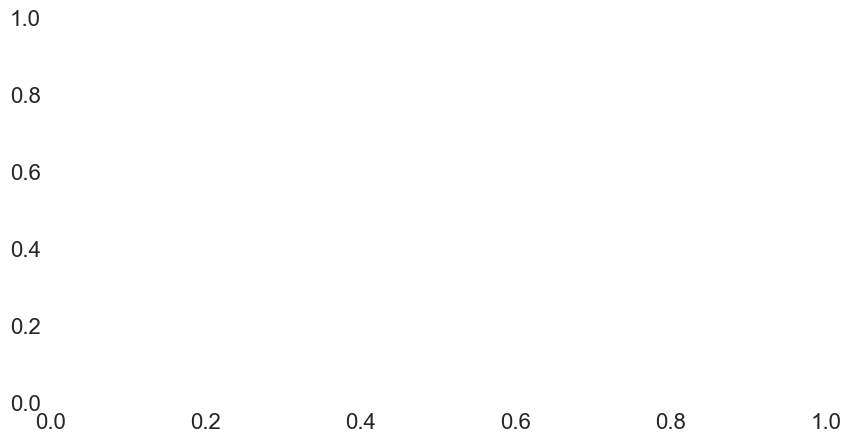

In [47]:
# plot time vs viscosity for each ionic liquid
plt.figure(figsize=(10,5))

# plt.plot(final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)'],
# final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'], 'b-')
plt.plot(final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)'],
         final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'], 'r')
plt.plot(final_df[sub_hpybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
         final_df[sub_hpybr_t_mask]['Viscosity_(cP)'], 'g-')
# plt.plot(final_df[sub_opybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
# final_df[sub_opybr_p_mask]['Viscosity_(cP)'], 'y-')
plt.plot(final_df[sub_opybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
         final_df[sub_opybr_t_mask]['Viscosity_(cP)'], 'k-')


# add a second y axis and plot the 'Shear Rate_(1/s)'
# plt.twinx()
# plt.plot(final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_hpybf4_t_mask]['Shear Rate_(1/s)'], 'r--')




plt.xlabel('Elapsed Time_(hh:mm:ss)')
plt.ylabel('Viscosity_(cP)')
# add legend
plt.legend([
    # 'hpybf4-AA-cons-P-2.csv',
    'hpybf4-AA-cons-T.csv',
    'hpybr-AA-cons-T.csv',
    # 'opybr-AA-cons-P.csv',
    'opybr-AA-cons-T.csv'
], loc='upper right')
# y axis in log scale
plt.yscale('log')
plt.title("Constant T = 380 F")


In [48]:
final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)']

4952       [1.16E-05]
4953       [2.31E-05]
4954       [3.47E-05]
4955       [4.63E-05]
4956       [5.79E-05]
            ...      
6731    [0.021087963]
6732    [0.021099537]
6733    [0.021111111]
6734    [0.021122685]
6735    [0.021134259]
Name: Elapsed Time_(hh:mm:ss), Length: 1784, dtype: object

TypeError: unhashable type: 'list'

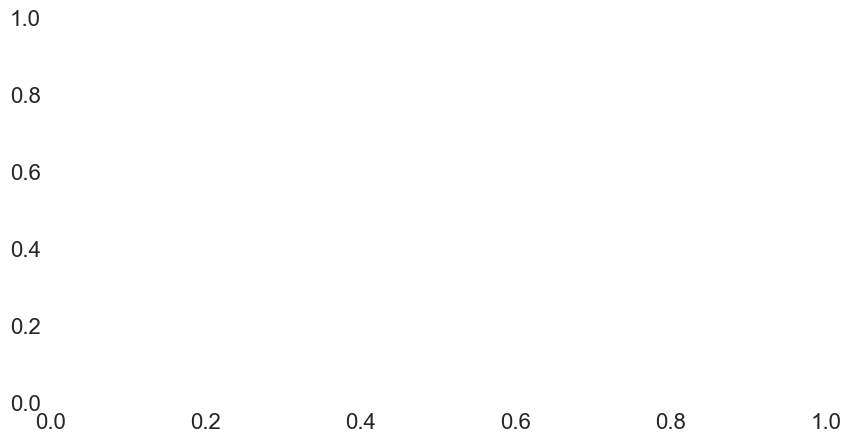

In [49]:
# plot time vs viscosity for each ionic liquid
plt.figure(figsize=(10,5))

# plt.plot(final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)'],
# final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'], 'b-')
plt.plot(final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)'],
         final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'], 'r')
plt.plot(final_df[sub_hpybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
         final_df[sub_hpybr_t_mask]['Viscosity_(cP)'], 'g-')
# plt.plot(final_df[sub_opybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
# final_df[sub_opybr_p_mask]['Viscosity_(cP)'], 'y-')
# plt.plot(final_df[sub_opybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_opybr_t_mask]['Viscosity_(cP)'], 'k-')

# add a second y axis and plot the 'Shear Rate_(1/s)'
# plt.twinx()
# plt.plot(final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_hpybf4_t_mask]['Shear Rate_(1/s)'], 'y--')




plt.xlabel('Elapsed Time_(hh:mm:ss)')
plt.ylabel('Viscosity_(cP)')
# add legend
plt.legend([
    # 'hpybf4-AA-cons-P-2.csv',
    'hpybf4-AA-cons-T.csv',
    'hpybr-AA-cons-T.csv',
    # 'opybr-AA-cons-P.csv',
#     'opybr-AA-cons-T.csv'
], loc='upper right')
# y axis in log scale
# plt.yscale('log')
plt.title("Constant T = 380 F")


In [50]:
final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)']

0       [0, 00, 01]
1       [0, 00, 02]
2       [0, 00, 03]
3       [0, 00, 04]
4       [0, 00, 05]
           ...     
4947    [1, 24, 25]
4948    [1, 24, 26]
4949    [1, 24, 27]
4950    [1, 24, 28]
4951    [1, 24, 29]
Name: Elapsed Time_(hh:mm:ss), Length: 4952, dtype: object

TypeError: unhashable type: 'list'

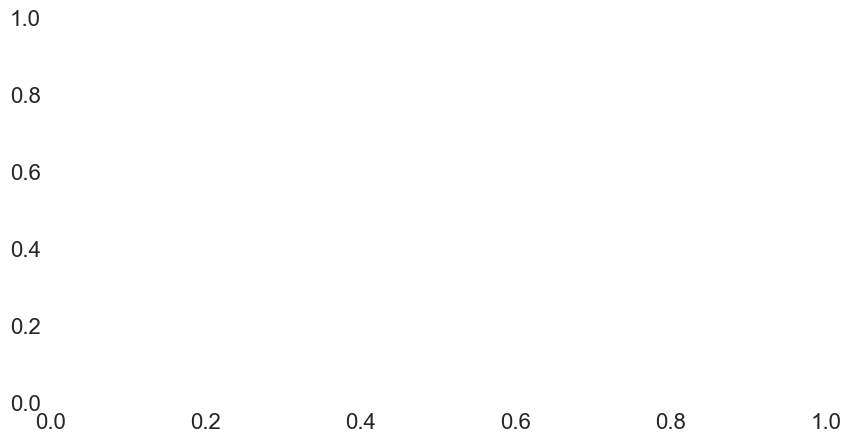

In [51]:
# plot time vs viscosity for each ionic liquid
plt.figure(figsize=(10,5))

plt.plot(final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'], 'b-')
# plt.plot(final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'], 'r')
# plt.plot(final_df[sub_hpybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_hpybr_t_mask]['Viscosity_(cP)'], 'g-')
plt.plot(final_df[sub_opybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_opybr_p_mask]['Viscosity_(cP)'], 'y-')
# plt.plot(final_df[sub_opybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_opybr_t_mask]['Viscosity_(cP)'], 'k-')
plt.plot(final_df[sub_hpybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_hpybr_p_mask]['Viscosity_(cP)'], 'g-')

plt.xlabel('Elapsed Time_(hh:mm:ss)')
plt.ylabel('Viscosity_(cP)')
# add legend
plt.legend([
    'hpybf4-AA-cons-P-2.csv',
    # 'hpybf4-AA-cons-T.csv',
    # 'hpybr-AA-cons-T.csv',
    'opybr-AA-cons-P.csv',
    # 'opybr-AA-cons-T.csv'
    'hpybr-cons-P.csv'
], loc='upper right')
# y axis in log scale
# plt.yscale('log')
plt.title("Constant P = 100 psi")


In [ ]:
# plot time vs viscosity for each ionic liquid
plt.figure(figsize=(10,5))

plt.plot(final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'], 'b-')
# plt.plot(final_df[sub_hpybf4_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'], 'r')
# plt.plot(final_df[sub_hpybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_hpybr_t_mask]['Viscosity_(cP)'], 'g-')
plt.plot(final_df[sub_opybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_opybr_p_mask]['Viscosity_(cP)'], 'y-')
# plt.plot(final_df[sub_opybr_t_mask]['Elapsed Time_(hh:mm:ss)'],
#          final_df[sub_opybr_t_mask]['Viscosity_(cP)'], 'k-')
plt.plot(final_df[sub_hpybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_hpybr_p_mask]['Viscosity_(cP)'], 'g-')
plt.xlabel('Elapsed Time_(hh:mm:ss)')
plt.ylabel('Viscosity_(cP)')
# add legend
plt.legend([
    'hpybf4-AA-cons-P-2.csv',
    # 'hpybf4-AA-cons-T.csv',
    # 'hpybr-AA-cons-T.csv',
    'opybr-AA-cons-P.csv',
    # 'opybr-AA-cons-T.csv'
    'hpybr-cons-P.csv'
], loc='upper right')
# y axis in log scale
# plt.yscale('log')


In [52]:
final_df.columns

Index(['Elapsed Time_(hh:mm:ss)', 'Sample Temp_(°F)', 'Pressure_(PSIg)',
       'Rotor Speed_(RPM)', 'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)',
       'Viscosity_(cP)', 'dataframe_name', 'condition', 'ionic_liquid'],
      dtype='object')

TypeError: unhashable type: 'list'

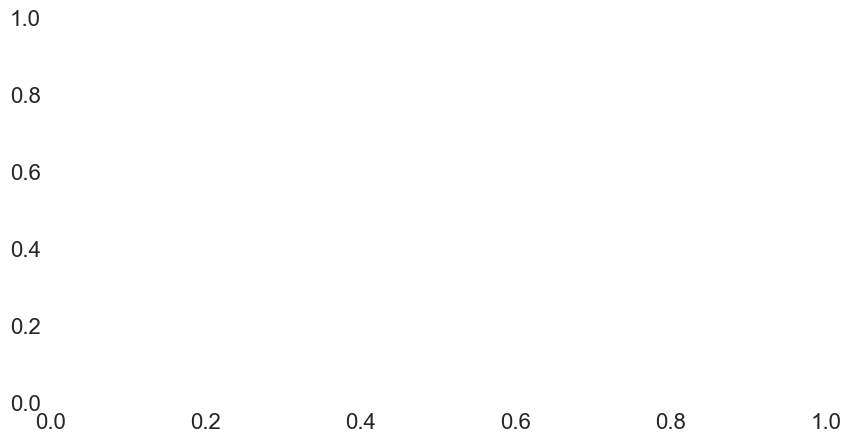

In [53]:
# plot time vs viscosity for each ionic liquid
plt.figure(figsize=(10,5))

# plt.plot(final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)'],
# final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'], 'b-')

# plt.plot(final_df[sub_opybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
# final_df[sub_opybr_p_mask]['Viscosity_(cP)'], 'y-')
#
plt.plot(final_df[sub_hpybr_p_mask]['Elapsed Time_(hh:mm:ss)'],
final_df[sub_hpybr_p_mask]['Pressure_(PSIg)'], 'g-')

plt.xlabel('Elapsed Time_(hh:mm:ss)')
plt.ylabel('Viscosity_(cP)')
# add legend
plt.legend([
    # 'hpybf4-AA-cons-P-2.csv',
    # 'hpybf4-AA-cons-T.csv',
    # 'hpybr-AA-cons-T.csv',
    # 'opybr-AA-cons-P.csv',
    # 'opybr-AA-cons-T.csv'
    'HPyBr'
], loc='upper right')
# y axis in log scale
# plt.yscale('log')


In [54]:
b = final_df[sub_hpybr_p_mask]['Elapsed Time_(hh:mm:ss)'].apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]))
time_values = b

In [55]:
final_df.columns

Index(['Elapsed Time_(hh:mm:ss)', 'Sample Temp_(°F)', 'Pressure_(PSIg)',
       'Rotor Speed_(RPM)', 'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)',
       'Viscosity_(cP)', 'dataframe_name', 'condition', 'ionic_liquid'],
      dtype='object')

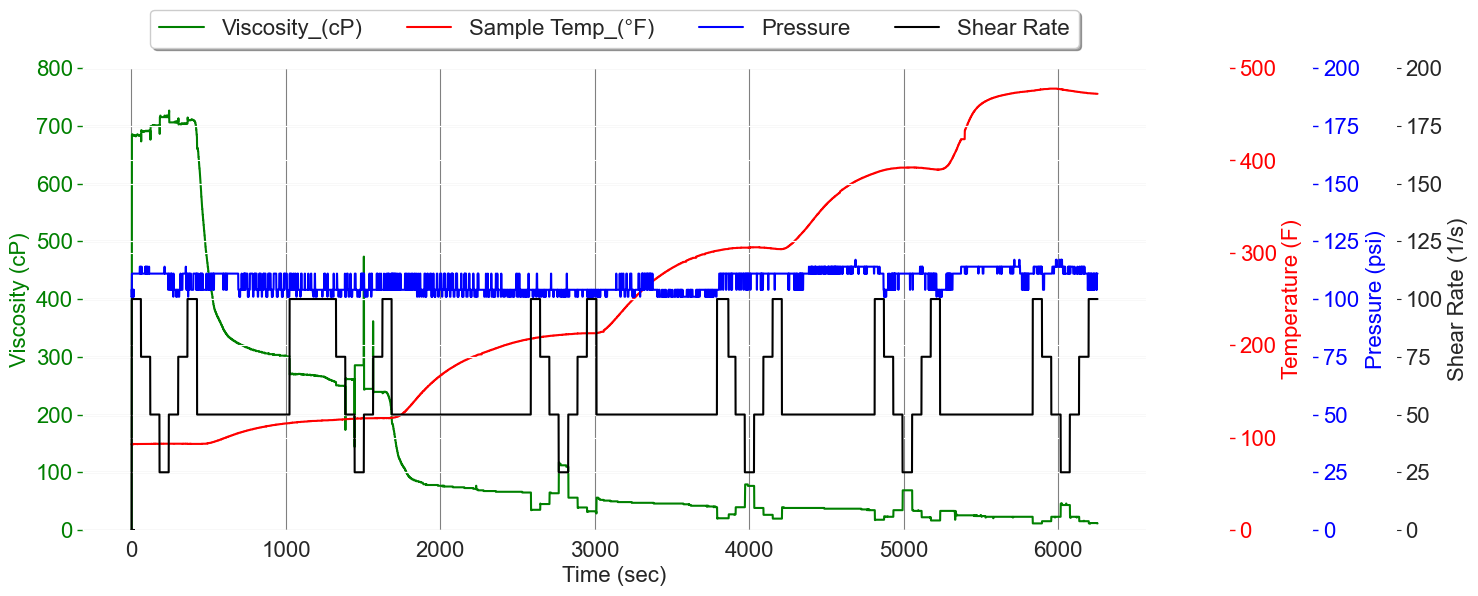

In [56]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(17, 6))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()

# Offset the right spines of twin1 and twin2
twin1.spines.right.set_position(("outward", 60))
twin2.spines.right.set_position(("outward", 120))
twin3.spines.right.set_position(("outward", 180))

# Plot the data on the respective axes
p1, = ax.plot(time_values, final_df[sub_hpybr_p_mask]['Viscosity_(cP)'], 'g-', label="Viscosity_(cP)")
p2, = twin1.plot(time_values, final_df[sub_hpybr_p_mask]['Sample Temp_(°F)'], "r-", label="Sample Temp_(°F)")
p3, = twin2.plot(time_values, final_df[sub_hpybr_p_mask]['Pressure_(PSIg)'], "b-", label="Pressure")
p4, = twin3.plot(time_values, final_df[sub_hpybr_p_mask]['Shear Rate_(1/s)'], "k-", label="Shear Rate")

# Set the limits and labels for each axis
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Viscosity (cP)")
ax.set_ylim(0, 800)

twin1.set_ylabel("Temperature (F)")
twin1.set_ylim(0, 500)

twin2.set_ylabel("Pressure (psi)")
twin2.set_ylim(0, 200)

twin3.set_ylabel("Shear Rate (1/s)")
twin3.set_ylim(0, 200)

# Set the colors of the axis labels
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

# Adjust the tick parameters for each axis
tkw = dict(size=4, width=1)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# Create the legend
lines = [p1, p2, p3, p4]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)

# Show the grid
ax.grid(True, color='grey')

plt.show()


In [57]:
final_df[sub_hpybr_p_mask]['Elapsed Time_(hh:mm:ss)']

9649     [0, 00, 01]
9650     [0, 00, 02]
9651     [0, 00, 03]
9652     [0, 00, 04]
9653     [0, 00, 05]
            ...     
15712    [1, 44, 10]
15713    [1, 44, 11]
15714    [1, 44, 12]
15715    [1, 44, 13]
15716    [1, 44, 14]
Name: Elapsed Time_(hh:mm:ss), Length: 6068, dtype: object

In [58]:
final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)']

0       [0, 00, 01]
1       [0, 00, 02]
2       [0, 00, 03]
3       [0, 00, 04]
4       [0, 00, 05]
           ...     
4947    [1, 24, 25]
4948    [1, 24, 26]
4949    [1, 24, 27]
4950    [1, 24, 28]
4951    [1, 24, 29]
Name: Elapsed Time_(hh:mm:ss), Length: 4952, dtype: object

In [59]:
b = final_df[sub_hpybf4_p_mask]['Elapsed Time_(hh:mm:ss)'].apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]))
time_values = b

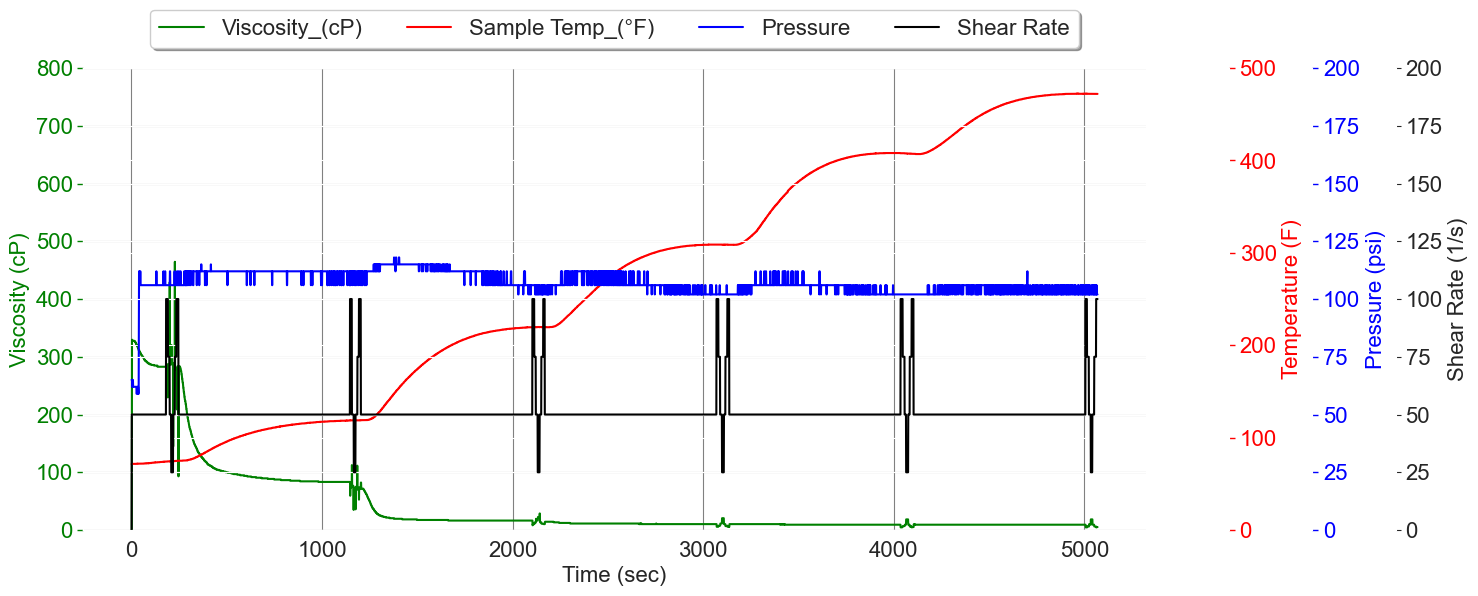

In [60]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(17, 6))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()

# Offset the right spines of twin1 and twin2
twin1.spines.right.set_position(("outward", 60))
twin2.spines.right.set_position(("outward", 120))
twin3.spines.right.set_position(("outward", 180))

# Plot the data on the respective axes
p1, = ax.plot(time_values, final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'], 'g-', label="Viscosity_(cP)")
p2, = twin1.plot(time_values, final_df[sub_hpybf4_p_mask]['Sample Temp_(°F)'], "r-", label="Sample Temp_(°F)")
p3, = twin2.plot(time_values, final_df[sub_hpybf4_p_mask]['Pressure_(PSIg)'], "b-", label="Pressure")
p4, = twin3.plot(time_values, final_df[sub_hpybf4_p_mask]['Shear Rate_(1/s)'], "k-", label="Shear Rate")

# Set the limits and labels for each axis
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Viscosity (cP)")
ax.set_ylim(0, 800)

twin1.set_ylabel("Temperature (F)")
twin1.set_ylim(0, 500)

twin2.set_ylabel("Pressure (psi)")
twin2.set_ylim(0, 200)

twin3.set_ylabel("Shear Rate (1/s)")
twin3.set_ylim(0, 200)

# Set the colors of the axis labels
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

# Adjust the tick parameters for each axis
tkw = dict(size=4, width=1)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# Create the legend
lines = [p1, p2, p3, p4]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)

# Show the grid
ax.grid(True, color='grey')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
# make plot background white
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(17,6))
fig.subplots_adjust(right=0.75)
# adjust axis font size


twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.left.set_position(("axes", 0.2))

p1, = ax.plot(
    time_values,
    final_df[sub_hpybr_p_mask]['Viscosity_(cP)'], 'g-', label="Viscosity_(cP)")

p2, = twin1.plot(
    time_values,
    final_df[sub_hpybr_p_mask]['Sample Temp_(°F)'], "r-", label="Sample Temp_(°F)")

p3, = twin2.plot(
    time_values,
    final_df[sub_hpybr_p_mask]['Pressure_(PSIg)'], "b-", label="Pressure")

p4, = twin3.plot(
    time_values,
    final_df[sub_hpybr_p_mask]['Shear Rate_(1/s)'], "k-", label="Shear Rate")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
twin1.set_ylim(0, 500)
twin2.set_ylim(0, 200)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Viscosity (cP)")
twin1.set_ylabel("Temperature (F)")
twin2.set_ylabel("Pressure (psi)")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)

ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3, p4])
# color the legend background
ax.legend(handles=[p1, p2, p3], facecolor='white', framealpha=1)
# put legend middle top
ax.legend(handles=[p1, p2, p3], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)
# make grid on and set grid color to grey
ax.grid(True, color='grey')
plt.show()

In [ ]:
asdasd

In [ ]:
# plt.figure(figsize=(10,5))
#
# plt.hist([final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'],
#          final_df[sub_hpybr_t_mask]['Viscosity_(cP)'],
#          final_df[sub_opybr_t_mask]['Viscosity_(cP)']],
#          ec='k', alpha=0.5, bins=25,  color=('b','r', 'g'),
#          label=['sub_hpybf4_t_mask', 'sub_hpybr_t_mask', 'sub_opybr_t_mask'],
#          log=True)
#
# plt.xlabel('Viscosity_(cP)');
# plt.ylabel('density')
# plt.legend(loc='upper right'), plt.title('log scale')
# plt.legend(['sub_hpybf4_t_mask', 'sub_hpybr_t_mask', 'sub_opybr_t_mask'])

In [ ]:
# plt.figure(figsize=(10,5))
#
# plt.hist([final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'],
#          final_df[sub_opybr_p_mask]['Viscosity_(cP)']],
#          ec='k', alpha=0.5, bins=25,  color=('b','r'),
#          label=['HPyBF4', 'OPyBr'],
#          log=True)
#
# plt.xlabel('Viscosity_(cP)')
# plt.ylabel('density')
# plt.legend(loc='upper right'), plt.title('log scale')
# plt.legend(['HPyBF4', 'OPyBr'])

In [ ]:
col1 = 'condition'
col2_numer = 'Viscosity_(cP)'

plt.figure(figsize=(17,10))

ax = sns.boxplot(x=col1, y=col2_numer, data=final_df, palette="Spectral",
                 hue=final_df['ionic_liquid'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# ax = sns.swarmplot(x=col1, y=col2_numer, data=final_df, color='#7d0013')
#make y axis log scale
plt.yscale('log')
plt.xlabel('test condiction')
plt.show()

In [ ]:
final_df.groupby("ionic_liquid")["Viscosity_(cP)"].describe().T

In [ ]:
# plt.figure(figsize=(17,10))
#
# ax = sns.boxplot(y=final_df['dataframe_name'],
#                  x=final_df['Viscosity_(cP)'],
#                  data=final_df,
#                  palette="Spectral",
#                  hue=final_df['condition'])
# # ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
# # make x axis log scale
# plt.xscale('log')
# plt.xlabel('Viscosity_(cP)')
# plt.ylabel('ionic liquid name')
# plt.show()

In [ ]:
# col1 = ['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
#        'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
#        'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)']
#
# y_col_name = ['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
#        'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
#        'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)']
#
#
#
# plt.figure(figsize=(12,9))
# for i, col in enumerate(col1):
#
#     plt.subplot(3,3,i+1)
#
#     plt.hist2d(final_df['Viscosity_(cP)'],
#                final_df[col],
#                cmap=plt.cm.jet,
#                bins=(30, 30))
#     plt.xlabel('Viscosity_(cP)', fontsize=14)
#     plt.ylabel(y_col_name[i], fontsize=14)
# plt.tight_layout()
# # plt.savefig('../Figures/P02_stat_EDA.png')
# plt.show()

In [ ]:
# ax = plt.gca()
# selected_df = final_df[final_df['dataframe_name'] == 'opybr-AA-cons-T.csv']
# selected_df.plot(kind="scatter", x="Pressure_(PSIg)",
#         y='Sample Temp_(°F)',
#         s=selected_df['Viscosity_(cP)']/3,
#         c=selected_df['Viscosity_(cP)'],
#         label="Viscosity_(cP)",
#         colorbar=True,
#         grid=True,
#         cmap='Reds',
#         alpha=0.7,
#         figsize=(10,7),
#         ax = ax
# )
# # plt.legend()
# # make both axis log scale
# plt.xscale('log')
# plt.yscale('log')
# # grid on
# plt.grid(True)
# plt.tight_layout()
# # add title
# plt.title('Viscosity_(cP) vs Pressure_(PSIg) and Sample Temp_(°F) for opybr-AA-cons-T.csv')
# plt.show()

In [ ]:
# keep_cols = ['ionic_liquid', 'Viscosity_(cP)', 'Pressure_(PSIg)',
#        'Sample Temp_(°F)', 'Rotor Speed_(RPM)', 'Shear Rate_(1/s)',
#        'Shear Stress_(dyne/cm²)']
# selected_df = final_df[keep_cols]
#
# import seaborn as sns
# # sns.set_theme(style="ticks")
#
# sns.pairplot(selected_df, hue="ionic_liquid", kind="hist")

In [ ]:
import seaborn as sns
# sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=final_df, kind="bar",
    x="ionic_liquid", y="Viscosity_(cP)", hue="condition",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Viscosity_(cP)")
# tilt x label 45 degree
g.set_xticklabels(rotation=45)
# g.legend.set_title("")

In [ ]:
import seaborn as sns
# sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=final_df, kind="bar",
    x="condition", y="Viscosity_(cP)", hue="ionic_liquid",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Viscosity_(cP)")
# tilt x label 45 degree
g.set_xticklabels(rotation=45)
# g.legend.set_title("")

In [ ]:
final_df.columns

In [ ]:
# import seaborn as sns
# # sns.set_theme(style="whitegrid")
# plt.figure(figsize=(12,9))
# # Draw a nested violinplot and split the violins for easier comparison
# sns.violinplot(data=final_df, x="ionic_liquid", y="Viscosity_(cP)", hue="condition",
#                split=True, inner="quart", linewidth=1,
#                palette={"Pressure constant": "b", "Temprature constant": ".85"})
# g.set_xticklabels(rotation=45)
# # make y axis log scale
# plt.yscale('log')
# sns.despine(left=True)

In [ ]:
sns.jointplot(data=final_df, x="Sample Temp_(°F)", y="Shear Rate_(1/s)", hue="ionic_liquid")

In [ ]:
sns.jointplot(data=final_df, x="Sample Temp_(°F)", y="Pressure_(PSIg)", hue="ionic_liquid")

In [ ]:
sns.jointplot(data=final_df, x="Sample Temp_(°F)", y="Shear Rate_(1/s)", hue="ionic_liquid", kind="kde")

In [ ]:
g = sns.JointGrid(data=final_df, x="Sample Temp_(°F)", y="Shear Rate_(1/s)", hue="ionic_liquid",)
g.plot(sns.scatterplot, sns.histplot)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=final_df,
    x="Sample Temp_(°F)",
    y="Shear Rate_(1/s)",
    hue="Viscosity_(cP)",
    size="Viscosity_(cP)",
    palette=cmap,
    sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Sample Temp_(°F)", y="Shear Rate_(1/s)",
            data=final_df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Sample Temp_(°F)", y="Shear Rate_(1/s)",
              data=final_df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)